# Esercitazione 5a settimana - Fisica Computazionale


## **Moto circolare uniforme**

tratti da "Physics for Scientists and Engineers", 6th Edition, ess. 62-63-65, cap. 6, pag. 178.

## **Esercizio 1.1**
Nelle opere di fantascienza troviamo spesso esempi di veicoli spaziali che per generare una gravità artificiale al loro interno [ruotano intorno al loro asse](https://youtu.be/BKBYB7qG4X0?si=WyPR9-ZFafuF9w4T&t=157). Considerando una stazione spaziale del raggio di 120 m, quale dovrebbe essere la frequenza di rotazione affinché la gravità artificiale fosse $0.3\ g$? Ogni quanti secondi la stazione compirebbe un giro completo?

## **Esercizio 1.2**
An amusement park ride consists of a rotating circular platform 8.00 m in diameter from which 10.0 kg seats are suspended at the end of 2.50 m massless chains. When the system rotates, the chains make an angle $\theta = 28.0$° with the vertical. 

- What is the speed of each seat? 

- Draw a free-body diagram of a 40.0 kg child riding in a seat and find the tension in the chain.

## **Esercizio 1.3**
An amusement park ride consists of a large vertical cylinder that spins about its axis fast enough such that any person inside is held up against the wall when the floor drops away. The coefficient of static friction between person and wall is $\mu_s$ , and the radius of the cylinder is $R$. 


- Show that the maximum period of revolution necessary to keep the person from falling is $T =(4\pi^2R\mu_s/g)^{1/2}$.
-  Obtain a numerical value for T if $R = 4.00\ m$ and $\mu_s = 0.400$. How many revolutions per minute does the cylinder make?

## **Forza elastica**

La legge di Hooke afferma che un corpo elastico ideale che subisce una deformazione $\Delta \vec{x}$, per esempio una molla allungata o compressa rispetto alla sua lunghezza a riposo, esercita una forza opposta a $\Delta \vec{x}$ e ad esso direttamente proporzionale secondo una costante elastica $k$.
## $$\vec{F}= -k\Delta \vec{x}$$

## **Esercizio 2. Bungee jumping**

Un uomo di 80 kg vuole lanciarsi per un salto di bungee jumping da un ponte alto 100 m rispetto alla superficie del fiume sottostante, legato ad una corda di lunghezza a riposo $\ell_0$. La corda, **quando viene allungata rispetto alla sua lunghezza a riposo**, si comporta come un corpo elastico ideale di costante $k=50\ N/m$. 

Se l'uomo, per quel brivido in più, vuole arrivare a [sfiorare la superficie dell'acqua](https://www.youtube.com/shorts/QizvIz7XShM), quale deve essere il valore di $\ell_0$?

*NOTA 1: Trascura l'attrito dell'aria, considera il corpo dell'uomo come un punto materiale.*

*NOTA 2: anche se l'esercizio può essere risolto analiticamente usando considerazioni sulla conservazione dell'energia, trovare il risultato tramite simulazione numerica (metodo di Eulero).*

In [ ]:
# il tuo codice



## **Dinamica del punto materiale in un fluido - l'attrito viscoso**

Come visto nel caso dell'attrito radente, statico e dinamico, le forze di attrito si oppongono sempre al moto. 

Nel caso dell'attrito viscoso esercitato da un fluido (come aria o acqua) e a velocità basse, la forza di attrito viscoso $\vec{F_{av}}$ prende una forma semplice: è direttamente proporzionale, ed appunto opposta in verso, alla velocità:
$$\vec{F_{av}}=-b \vec{v}$$

(quali sono le unità di misura di $b$?)

Scriviamo per esempio la seconda legge di Newton di un corpo **in presenza soltanto di attrito viscoso**:
$$ {F_{av}}= ma $$
$$ -bv = m\frac{dv}{dt} $$
dove $b$ dipende dalla forma e dimensione del corpo e dal fluido in cui si muove.
Questa ***equazione differenziale*** si può risolvere per separazione di variabili:
$$ \int_0^t \frac{dv}{v} = \int_0^t -\frac{b}{m}dt $$
$$ \ln v - \ln v_0 = -\frac{b}{m}t + 0$$
$$ v = v_0 e^{-\frac{t}{\tau}} $$
con $\tau =\frac{m}{b}$. Insomma **la velocità va velocemente a zero**, con un andamento esponenziale e con un *tempo caratteristico* $\tau$!

---

### Che cosa succede in presenza di gravità?
Cioè come cade un grave in un presenza di attrito viscoso? L'equazione differenziale ha ora un termine in più:
$$ mg-bv = m\frac{dv}{dt}\qquad (*) $$
Stavolta non risolviamola esplicitamente ma limitiamoci a seguire un'intuizione fisica per trovare un risultato interessante:

> (...) when $v = 0$, the magnitude of the resistive force $bv$ is also zero, and the acceleration $dv/dt$ is simply $g$. As $t$ increases, the magnitude of the resistive force increases and the acceleration decreases. The acceleration approaches zero when the magnitude of the resistive force approaches the sphere’s weight. In this situation, the speed of the sphere approaches its terminal speed $v_T$. In reality, the sphere only approaches terminal speed but never reaches terminal speed. We can obtain the terminal speed from Equation $(*)$ by setting $a = dv/dt = 0$. 

(tratto da "Physics for Scientists and Engineers", 6th Edition, par. 6.4, pag. 163)

Quindi in presenza della gravità esiste una **velocità limite** (*terminal velocity*)
$$ mg-bv_T = 0 \quad \Rightarrow\quad  v_T=\frac{mg}{b}$$ 
a cui la velocità di un oggetto in caduta libera tende per tempi lunghi ($t\rightarrow \infty$). La velocità limite non dipende quindi dalla velocità iniziale $v_0$! 

Diamo qui comunque la soluzione dell'equazione differenziale, che ci servirà per confrontare i risultati numerici con quelli che ci aspettiamo dalla teoria:

$$ v(t) = (v_0 - v_T) e^{-t/\tau} + v_T$$
 


### Soluzione numerica


In [9]:
import numpy as np

# dati
g = 9.81            #m/s**2
v0 = -3.             #m/s
m = 1.              #kg
b = .5          #N s/m
x0 = 0.0            #m
v_limite = m * g / b
tau = m / b

# inizializzazione 
x = x0
vx = v0

# tempi
t_max = 20 # tempo max (s)
dt = 0.01
t=0.
numpassi = int(t_max / dt)

# soluzione di F=ma
dati=open('viscoso1.txt','w')

for i in range(0,numpassi):
    t = dt * i
    ax = - b / m * vx - g
    dati.write('\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}\n'.format(t, x, vx, ax))
    
    vx = vx + ax * dt
    x=x + vx * dt
    
dati.close()



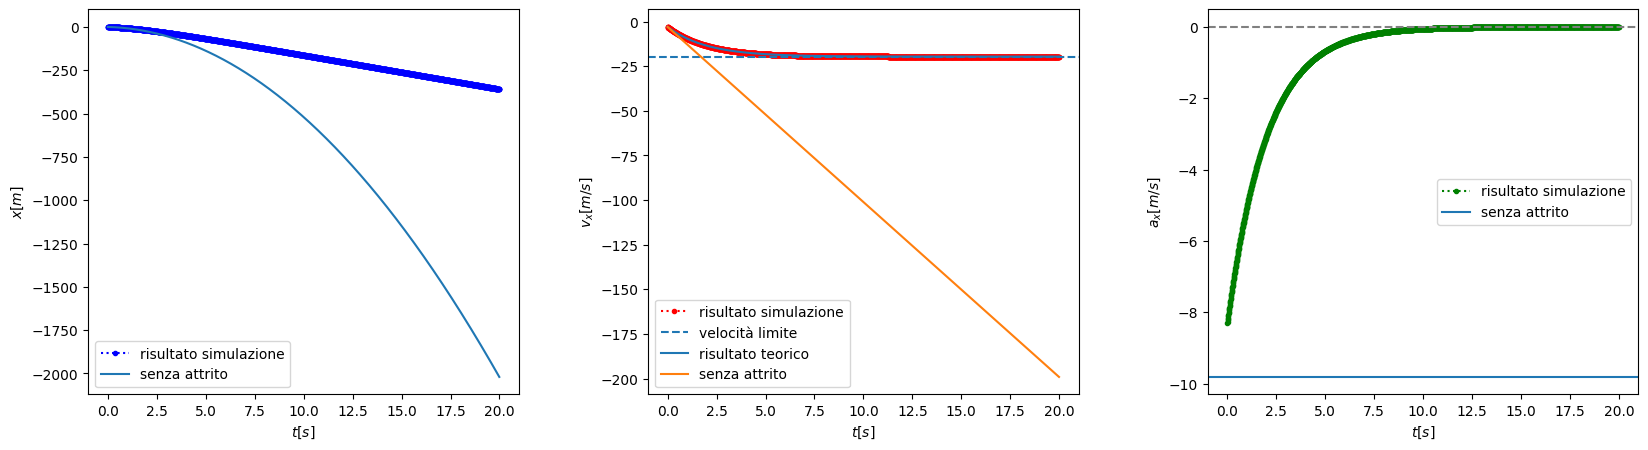

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=.3)

dati = np.loadtxt('viscoso1.txt',float)

t = dati[:,0]
x = dati[:,1]
vx = dati[:,2]
ax = dati[:,3]
v_lim = - m * g / b
v_teo = v_lim + (vx[0] - v_lim) * np.exp(-t/tau)

v0x = dati[0,2]

# grafico della posizione
axs[0].plot(t,x,'b.:', label='risultato simulazione')
axs[0].plot(t,v0x * t-0.5 * g * t**2, label='senza attrito')
# axs[0].plot(t,v_lim*t, ls='--', label='')
axs[0].set_xlabel('$t [s]$')
axs[0].set_ylabel('$x [m]$')
axs[0].legend()

# grafico della velocità
axs[1].plot(t,vx,'r.:', label='risultato simulazione')
axs[1].axhline(y=v_lim, ls='--', label='velocità limite')
axs[1].plot(t, v_teo, label='risultato teorico')
axs[1].plot(t, v0x - g * t, label='senza attrito')
axs[1].set_xlabel('$t [s]$')
axs[1].set_ylabel('$v_x [m/s]$')
axs[1].legend()


# grafico della accelerazione
axs[2].plot(t,ax,'g.:', label='risultato simulazione')
axs[2].axhline(y=0, ls='--', color='gray')
axs[2].axhline(y=-g, label='senza attrito')
axs[2].set_xlabel('$t [s]$')
axs[2].set_ylabel('$a_x [m/s]$')
axs[2].legend()



### Cambia i parametri della simulazione per trovare che cosa succede se:
- il grave viene lanciato inizialmente verso l'alto;
- la velocità iniziale è maggiore di quella limite;
- la massa cambia;
- il coefficiente di attrito viscoso $b$ cambia.

## **Esercizio 3. Moto del proiettile con attrito**

Dati la velocità iniziale del proiettile e l'angolo con cui viene lanciato trova, utilizzando il metodo di Eulero trova la gittata, l'altezza massima e il tempo di volo. Fai un grafico della traiettoria. Che cosa devi fare per introdurre l'attrito viscoso con l'aria? Fai un confronto con il caso senza attrito.

Assumi che il proiettile sia lanciato dall'origine e atterri al suolo ($y=0$).

Considera un proiettile di massa $m=100\ g$, con un coefficiente di attrito $b=10^{-2}\ N\cdot s/m$.

### **Qui sotto** è riportata la simulazione del moto del proiettile in assenza di attrito

vista nell'esercitazione dell'11 marzo 2025 $\rightarrow$ [Esercitazione_moto2D_soluzioni.ipynb](https://github.com/nicolalogullo/27005227-fisica-computazionale/blob/main/Esercizi_moto2D_soluzioni.ipynb). 


Il tempo di volo è 3.12 secondi.
La gittata è 40.1 metri.
L'altezza massima raggiunta è 11.9 metri.


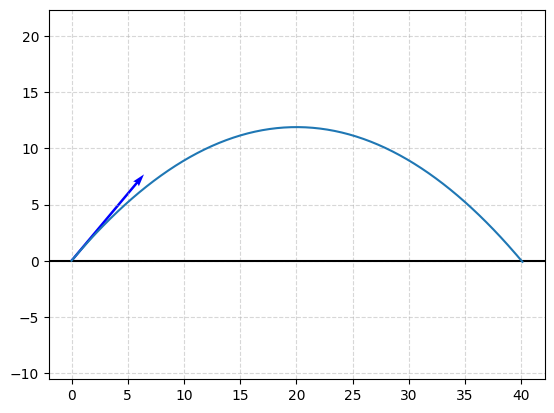

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from funzioni_fis_comp import *    # la nostra libreria personalizzata

# dati
x0, y0 = 0, 0       # [m]
v0_modulo = 20      # [m/s]
v0_angolo = 50          # [°]
ax, ay = 0, -9.81   # [m/s**2]
g = 9.81            #m/s**2

# Usiamo la funzione definita la scorsa settimana per passare da coordinate polari a cartesiane:
v0_vettore = da_polari_a_cartesiane(v0_modulo, v0_angolo)
v0x, v0y = v0_vettore

# l'incremento temporale
dt = 0.01          # [s]

# inizializziamo le liste che useremo per immagazzinare i risultati
ts = [0]
xs = [x0]
ys = [y0]
vxs = [v0x]
vys = [v0y]

# Metodo di Eulero:
while ys[-1] >= 0:
    # calcoliamo le velocità 
    vx = vxs[-1] + ax*dt
    vy = vys[-1] + ay*dt
    
    # aggiorniamo le posizioni
    x = xs[-1] + vx*dt
    y = ys[-1] + vy*dt

    # aggiorniamo le varie liste per tenere traccia del moto
    ts.append(ts[-1] + dt)

    xs.append(x)
    ys.append(y)

    vxs.append(vx)
    vys.append(vy)

# Calcoliamo i risultati richiesti
tempo_di_volo = ts[-1]
gittata = xs[-1]
altezza_max = max(ys)
print(f'Il tempo di volo è {tempo_di_volo:.3g} secondi.')
print(f'La gittata è {gittata:.3g} metri.')
print(f'L\'altezza massima raggiunta è {altezza_max:.3g} metri.')

# SALVIAMO I RISULTATI SU FILE
risultati = np.vstack((ts,xs,ys,vxs,vys))
np.savetxt('risultati_simulazioni/proiettile_senzaattrito.dat', risultati)

# Grafico della traiettoria
plt.axhline(y=0, ls='-', color='black')
plt.axis('equal')
plt.plot(xs, ys, '')
plt.grid(ls=':')

# Disegna direzione velocità iniziale
disegna_vettore(v0_vettore/v0_modulo * gittata/4, np.zeros_like(v0_vettore))


In [ ]:
# il tuo codice (riutilizza e modifica il codice per il caso senza attrito)